In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
import collections
warnings.filterwarnings ("ignore")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = pd.read_csv('netflix_titles.csv')

In [3]:
data.shape

(8807, 12)

In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
net_movie = data.loc[data.type=='Movie',:].reset_index()
net_movie.title = net_movie.title.str.lower()
net_movie['index']= net_movie.index
net_movie.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,2,s8,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,3,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,4,s13,Movie,je suis karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [6]:
tv_shows = data.loc[data['type']=='TV Show'].reset_index()
tv_shows.title = tv_shows.title.str.lower()
tv_shows['index']= tv_shows.index
tv_shows.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s2,TV Show,blood & water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,1,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,2,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
3,3,s5,TV Show,kota factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,4,s6,TV Show,midnight mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [7]:
tv_shows.duplicated().sum()

0

In [8]:
net_movie.duplicated().sum()

0

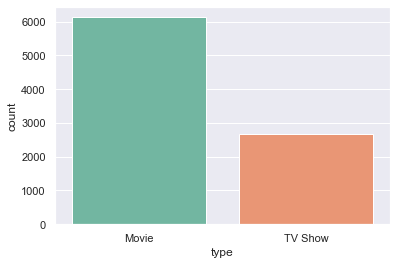

In [9]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=data, palette='Set2')

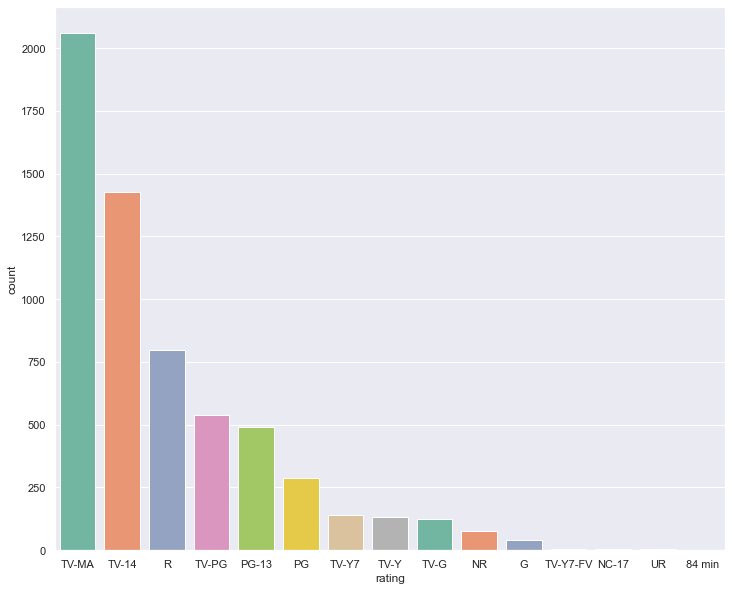

In [50]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=net_movie, palette="Set2", order=net_movie['rating'].value_counts().index[0:15])

In [11]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
data['clean_msg']= data['description'].apply(lambda x:remove_punctuation(x))
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_msg
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",As her father nears the end of his life filmma...
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",After crossing paths at a party a Cape Town te...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Feuds flirtations and toilet talk go down amon...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,In a city of coaching centers known to train I...


In [13]:
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())

In [14]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
#applying function to the column
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

In [15]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [26]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [16]:
#applying the function
data['no_stopwords']= data['msg_tokenied'].apply(lambda x:remove_stopwords(x))

In [17]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
data['msg_stemmed']=data['no_stopwords'].apply(lambda x: stemming(x))

In [18]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
data['msg_lemmatized']=data['no_stopwords'].apply(lambda x:lemmatizer(x))

In [19]:
net_movie.columns

Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'],
      dtype='object')

In [20]:
#selecting features
features = ['director', 'cast', 'country', 'description', 'listed_in']

In [21]:
#create a column in dataframe which combines all the selected features
for feature in features:
    net_movie[feature] = net_movie[feature].fillna('')
def combine_features (row):
    return row ['director'] + " " +row['cast']+" " +row['country']+" "+row['description']+" "+row['listed_in']
net_movie['combined_features'] = net_movie.apply(combine_features, axis=1)
print("Combine_Feature:", net_movie['combined_features'])

Combine_Feature: 0       Kirsten Johnson  United States As her father n...
1       Robert Cullen, José Luis Ucha Vanessa Hudgens,...
2       Haile Gerima Kofi Ghanaba, Oyafunmike Ogunlano...
3       Theodore Melfi Melissa McCarthy, Chris O'Dowd,...
4       Christian Schwochow Luna Wedler, Jannis Niewöh...
                              ...                        
6126    Majid Al Ansari Ali Suliman, Saleh Bakri, Yasa...
6127    David Fincher Mark Ruffalo, Jake Gyllenhaal, R...
6128    Ruben Fleischer Jesse Eisenberg, Woody Harrels...
6129    Peter Hewitt Tim Allen, Courteney Cox, Chevy C...
6130    Mozez Singh Vicky Kaushal, Sarah-Jane Dias, Ra...
Name: combined_features, Length: 6131, dtype: object


In [22]:
#create count matrix from this new combine column
CV = CountVectorizer()
count_matrix = CV.fit_transform(net_movie["combined_features"])
cosine_sim = cosine_similarity(count_matrix)

In [23]:
#get index of the movie from the title
def title_from_index(index):
    return net_movie[net_movie.index == index]["title"].values[0]

In [24]:
def index_from_title (df, title):
    return df[df.title == title] ['title'].values[0]

In [25]:
def index_from_title (df, title):
    return df[df.title == title] ['index'].values[0]

In [47]:
#get the list of similar movies in descending order of simtlarity score
def selectmovie(movie_user_likes):
    try:
        movie_user_likes = movie_user_likes.lower()
        movie_index = index_from_title(net_movie,movie_user_likes)
        similar_movies = list(enumerate(cosine_sim[movie_index]))
        sorted_similar_movies = sorted(similar_movies, key=lambda x:x[1],reverse=True)[1:]
        i=0
        print('Top 5 similar movies to' +movie_user_likes+'are:\n')
        
        for element in sorted_similar_movies:
            print(title_from_index(net_movie,element[0]))
            i=i+1
            if i>=5:
                break
    except Exception as e:
        print(e)
        print('Movie not found on Netflix')

In [48]:
#print the title of top 5 similar movies
selectmovie('automata')

Top 5 similar movies toautomataare:

title_from_index() takes 1 positional argument but 2 were given
Movie not found on Netflix


In [29]:
data.head(55)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",As her father nears the end of his life filmma...,as her father nears the end of his life filmma...,[as her father nears the end of his life filmm...,[as her father nears the end of his life filmm...,[as her father nears the end of his life filmm...,[as her father nears the end of his life filmm...
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",After crossing paths at a party a Cape Town te...,after crossing paths at a party a cape town te...,[after crossing paths at a party a cape town t...,[after crossing paths at a party a cape town t...,[after crossing paths at a party a cape town t...,[after crossing paths at a party a cape town t...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,To protect his family from a powerful drug lor...,to protect his family from a powerful drug lor...,[to protect his family from a powerful drug lo...,[to protect his family from a powerful drug lo...,[to protect his family from a powerful drug lo...,[to protect his family from a powerful drug lo...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Feuds flirtations and toilet talk go down amon...,feuds flirtations and toilet talk go down amon...,[feuds flirtations and toilet talk go down amo...,[feuds flirtations and toilet talk go down amo...,[feuds flirtations and toilet talk go down amo...,[feuds flirtations and toilet talk go down amo...
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,In a city of coaching centers known to train I...,in a city of coaching centers known to train i...,[in a city of coaching centers known to train ...,[in a city of coaching centers known to train ...,[in a city of coaching centers known to train ...,[in a city of coaching centers known to train ...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,The arrival of a charismatic young priest brin...,the arrival of a charismatic young priest brin...,[the arrival of a charismatic young priest bri...,[the arrival of a charismatic young priest bri...,[the arrival of a charismatic young priest bri...,[the arrival of a charismatic young priest bri...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Equestrias divided But a brighteyed hero belie...,equestrias divided but a brighteyed hero belie...,[equestrias divided but a brighteyed hero beli...,[equestrias divided but a brighteyed hero beli...,[equestrias divided but a brighteyed hero beli...,[equestrias divided but a brighteyed hero beli...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, Inte